<h1>Proyecto 1</h1>

In [36]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8", index_col=0)
df.columns

Index(['text', 'class'], dtype='object')

In [38]:
df.sample(5)

,text,class
Unnamed: 0,,
279197,I really feel like I want toSo last month I tr...,suicide
83988,Will the fact that I've slightly grown tiddies...,non-suicide
13419,I NEED HELP So basically I’m struggling like I...,non-suicide
343029,If I died right now no one would find me for w...,suicide
252206,My phone hasn't had a single notification for ...,non-suicide


In [39]:
df.dtypes

text     object
class    object
dtype: object

In [40]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=28)

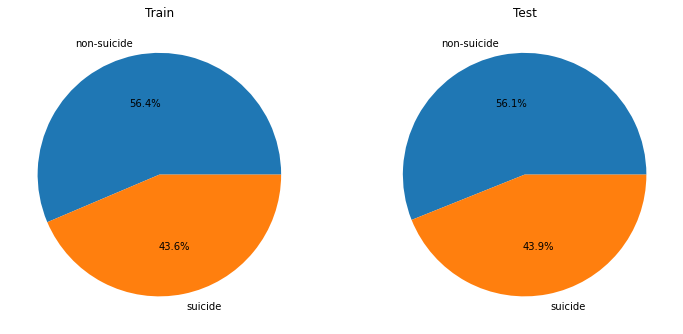

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [43]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [45]:
bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_bow = bow.fit_transform(x_train)
len(bow.get_feature_names())

In [ ]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
len(tfidf.get_feature_names())